In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

# change current working directory to the root of the project
import os
os.chdir(os.path.dirname(os.getcwd()))

# Purpose
- Purpose of this notebook is to load raw data and preprocess

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [3]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

/var/folders/rx/jl4f7yr95xd03cgb4sg2w99h0000gn/T/ipykernel_4150/4075833985.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Load Data

In [4]:
nrows = None
# import csv data
df_data = pd.read_csv('data/raw/train_data.csv', nrows=nrows)
df_labels = pd.read_csv('data/raw/train_labels.csv', nrows=nrows)

display(df_data.head())
display(df_labels.head())

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


# EDA

In [5]:
# check for multiple target labels per id
print('Number of multiple labels per id: {}'.format(df_labels.duplicated(subset='customer_ID').sum()))

Number of multiple labels per id: 0


In [6]:
# check number of unique customer_IDs
print('Number of unique customer_IDs: {}'.format(df_data.customer_ID.nunique()))

Number of unique customer_IDs: 458913


In [7]:
# check for max and min range in S_2
print('Min value in S_2: {}'.format(df_data.S_2.min()))
print('Max value in S_2: {}'.format(df_data.S_2.max()))

Min value in S_2: 2017-03-01
Max value in S_2: 2018-03-31


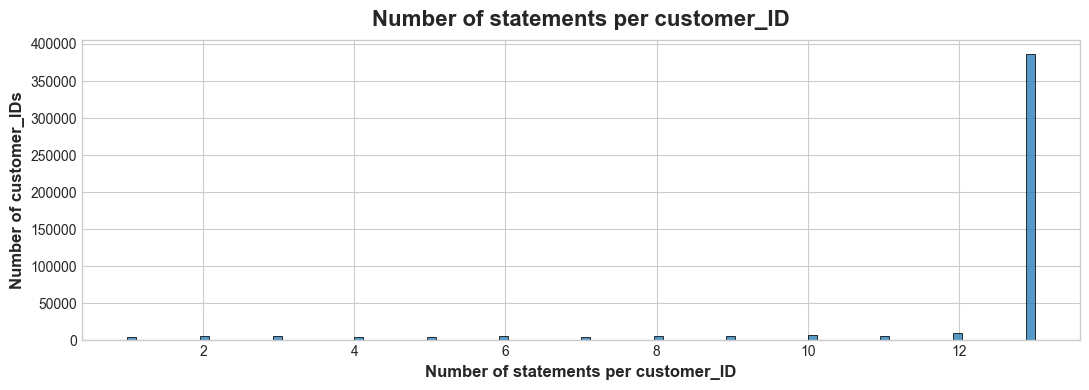

In [8]:
# check number of statements per customer_ID as a plot
sns.histplot(df_data.customer_ID.value_counts(), bins=100)
plt.title('Number of statements per customer_ID')
plt.xlabel('Number of statements per customer_ID')
plt.ylabel('Number of customer_IDs')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


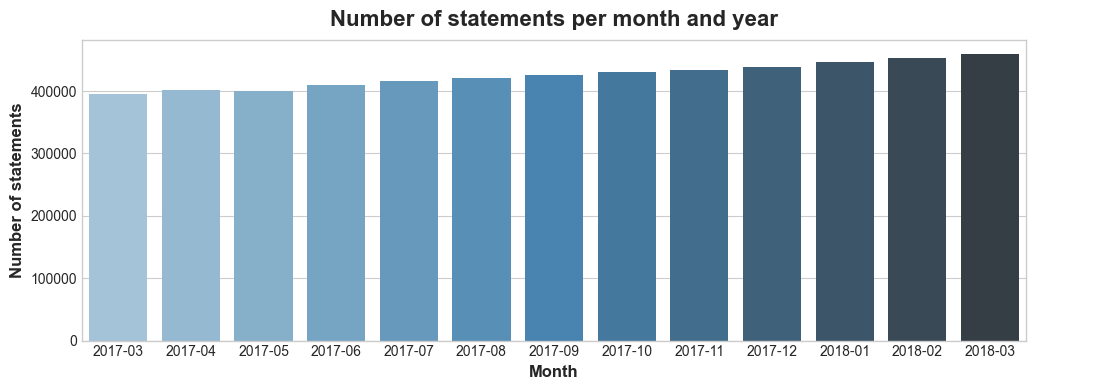

In [9]:
# extract month from S_2, and get statements per month and year as a plot
df_data_copy = df_data.copy()
df_data_copy['month'] = df_data_copy.S_2.apply(lambda x: x.split('-')[1])
df_data_copy['year'] = df_data_copy.S_2.apply(lambda x: x.split('-')[0])
df_data_copy['year_month'] = df_data_copy.year + '-' + df_data_copy.month
sns.countplot(x='year_month', data=df_data_copy, palette='Blues_d')
plt.title('Number of statements per month and year')
plt.xlabel('Month')
plt.ylabel('Number of statements')
plt.show()


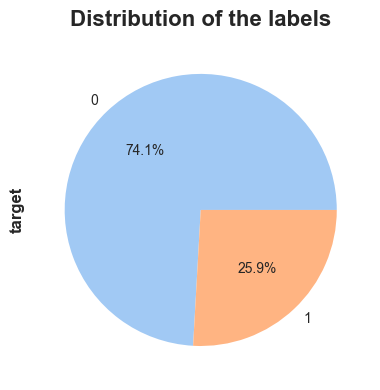

In [18]:
# plot the distribution of the labels as a percentage of the total pie chart
colors = sns.color_palette('pastel')[0:5]
df_labels['target'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Distribution of the labels')
plt.show()

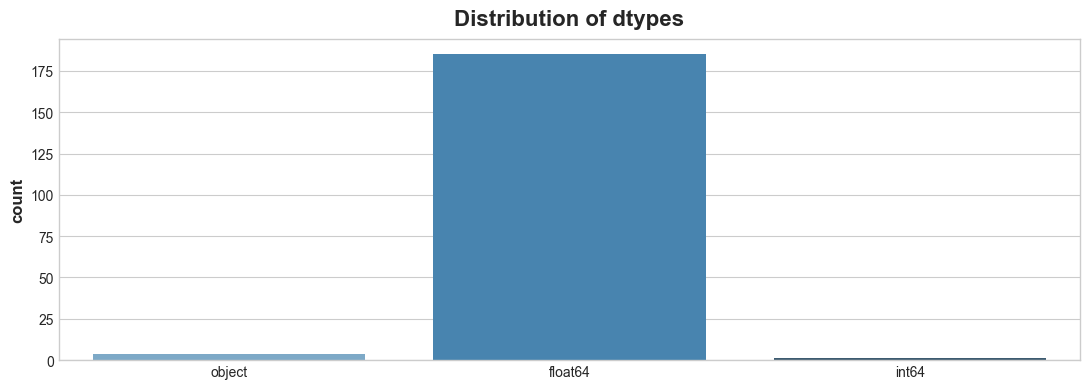

In [15]:
# check distribution of dtypes
sns.countplot(x=df_data.dtypes, palette='Blues_d')
plt.title('Distribution of dtypes')
plt.show()

In [12]:
# display all int columns
print('Number of int columns: {}'.format(df_data.select_dtypes(include='int').shape[1]))
display(df_data.select_dtypes(include='int').head())

# display all object columns
print('Number of object columns: {}'.format(df_data.select_dtypes(include='object').shape[1]))
display(df_data.select_dtypes(include='object').head())

# display all float columns
print('Number of float columns: {}'.format(df_data.select_dtypes(include='float').shape[1]))
display(df_data.select_dtypes(include='float').head())

Number of int columns: 1


,B_31
0,1
1,1
2,1
3,1
4,1


Number of object columns: 4


,customer_ID,S_2,D_63,D_64
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,CR,O
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,CR,O
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,CR,O
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,CR,O
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,CR,O


Number of float columns: 185


,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,NaN,NaN,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,NaN,NaN,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,NaN,NaN,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


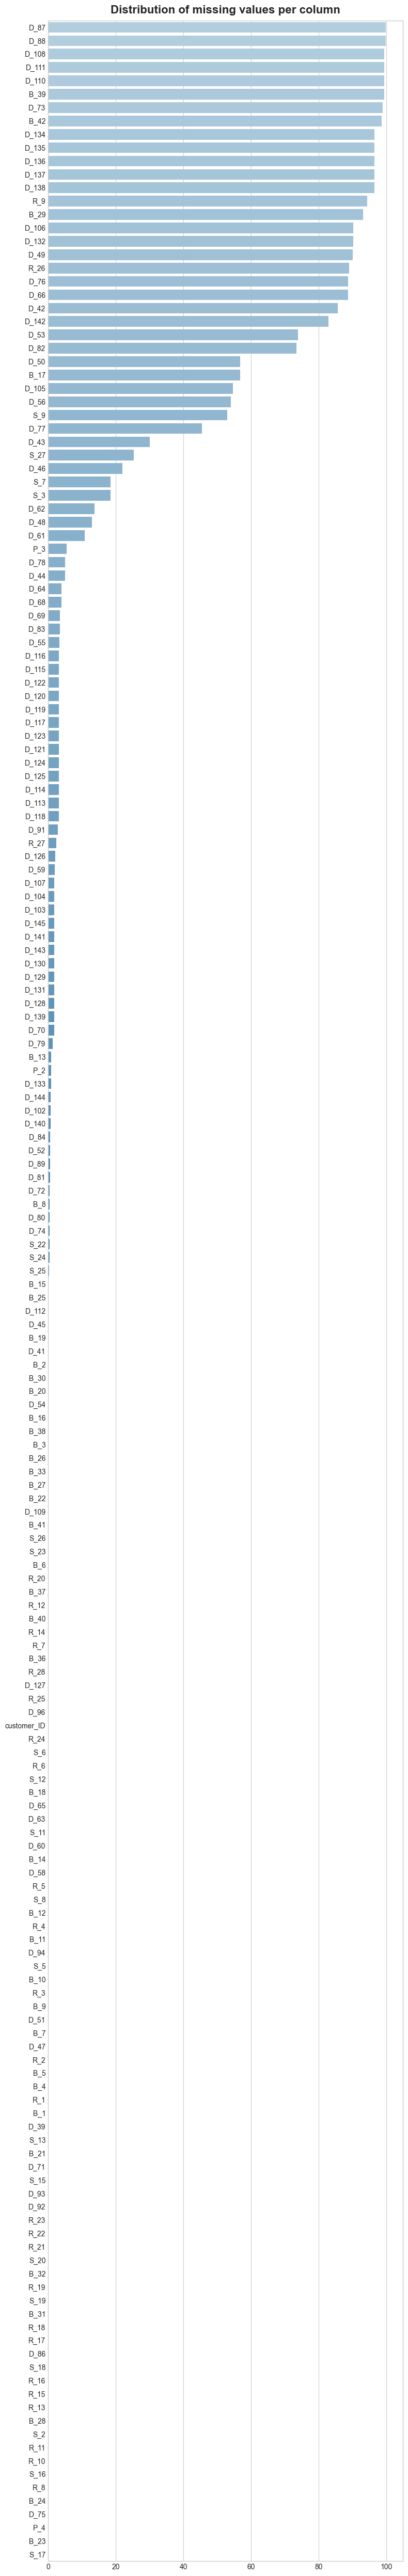

In [14]:
# check distribution of missing values
plt.figure(figsize=(8, 50))
sns.barplot(x=(df_data.isnull().sum().sort_values(ascending=False)/df_data.shape[0]*100.0).values, y=(df_data.isnull().sum().sort_values(ascending=False)/df_data.shape[0]*100.0).index, palette='Blues_d')
plt.title('Distribution of missing values per column')
plt.show()


# Summary
1. The data ranges from 2017-03-01 to 2018-03-31
2. There are 458913 unique customer_IDs
3. A large majority of customers have 13 statements each
4. There are 13 months of data
5. The target label distribution is; 74.1% of the customers have Not Defaulted, and 25.9% of the customers have Defaulted
6. There are 190 columns, with 3 dtypes, with 4 being object, 1 being int and the rest being float